In [1]:
import numpy as np
import pandas as pd
import re, string, unicodedata

#for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#for NLP
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from bs4 import BeautifulSoup
from keras.preprocessing import text, sequence
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn import metrics
import itertools
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet

In [2]:
df_fake = pd.read_csv("Fake.csv")
df_fake.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [3]:
df_true = pd.read_csv("True.csv")
df_true.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [4]:
df_fake.shape, df_true.shape

((23481, 4), (21417, 4))

In [5]:
df_fake['label']=0
df_true['label']=1

In [23]:
#Merge the two datasets into a single dataframe
df = pd.concat([df_true, df_fake])
df.sample(5)

title  \
5873   On Trump travel ban, China says 'reasonable co...   
17042  Spanish flag-waving underpins Rajoy's tough li...   
18185  Denmark set to become next European country to...   
16626  Dutchman put on trial for Ethiopian war crimes...   
21199  Panama ex-president facing political spying ch...   

                                                    text       subject  \
5873   BEIJING (Reuters) - China appeared to offer mi...  politicsNews   
17042  MADRID (Reuters) - At Jose Luis Sosa-Dias s fa...     worldnews   
18185  COPENHAGEN (Reuters) - Denmark looks set to be...     worldnews   
16626  AMSTERDAM (Reuters) - A Dutch citizen will go ...     worldnews   
21199  (Reuters) - A federal judge in Miami on Thursd...     worldnews   

                    date  label  
5873   January 30, 2017       1  
17042  October 19, 2017       1  
18185   October 6, 2017       1  
16626  October 24, 2017       1  
21199   August 31, 2017       1

<AxesSubplot:xlabel='label', ylabel='count'>

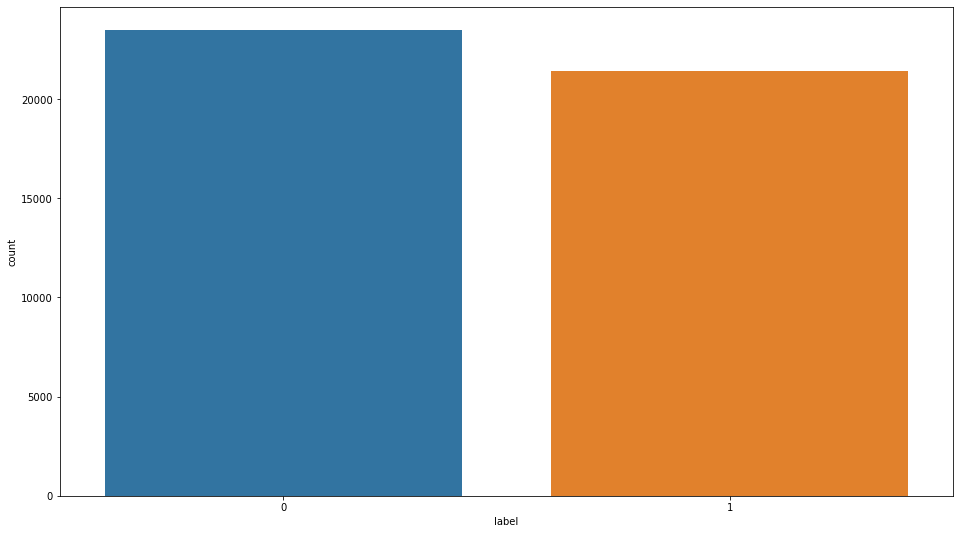

In [7]:
plt.figure(figsize=(16,9))
sns.countplot(df.label)

In [8]:
df.isna().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [10]:
df.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

<AxesSubplot:xlabel='subject', ylabel='count'>

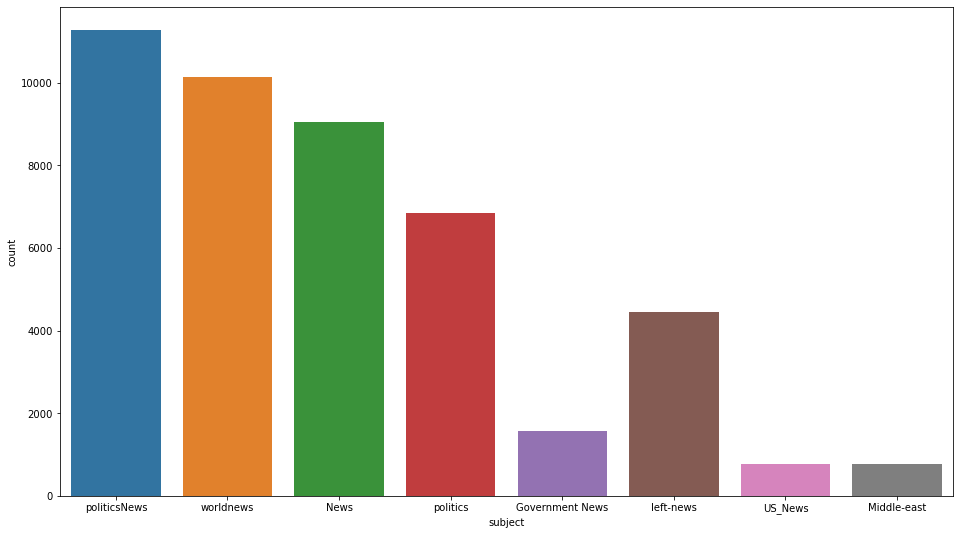

In [11]:
plt.figure(figsize=(16,9))
sns.countplot(x='subject', data=df)

<AxesSubplot:xlabel='subject', ylabel='count'>

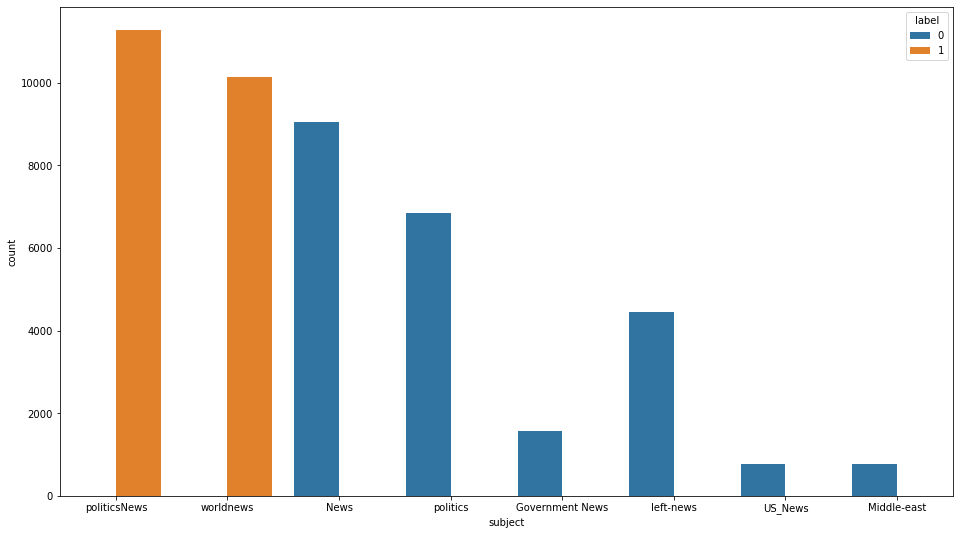

In [14]:
plt.figure(figsize=(16,9))
sns.countplot(x='subject', hue='label', data=df)

In [15]:
import plotly.express as px
fig = px.pie(df, names = "subject", title = "News Subject", hole = 0.5,
            width = 1000, height = 500, color_discrete_sequence = px.colors.sequential.Sunset_r)

fig.update_traces(textposition = "inside", textinfo = "percent+label",
                  marker = dict(line = dict(width = 1.2, color = "#000000")))

In [16]:
#Delete the columns that are unnecessary
df['text'] = df['title']+" "+df['text']

del df['title']
del df['subject']
del df['date']

In [21]:
df.sample(5)

text  label
6578    Donald Trump Infuriates Women With Disgusting...      0
11926  Melania's birth country Slovenia sees strong t...      1
5907    Trump Busted For Plagiarizing His Orlando Mas...      0
13648  BREAKING: US SUPREME COURT Upholds U. Of TX-Au...      0
10137  “I DID THE RIGHT THING” Pro-North Korea Commun...      0

<function matplotlib.pyplot.show(close=None, block=None)>

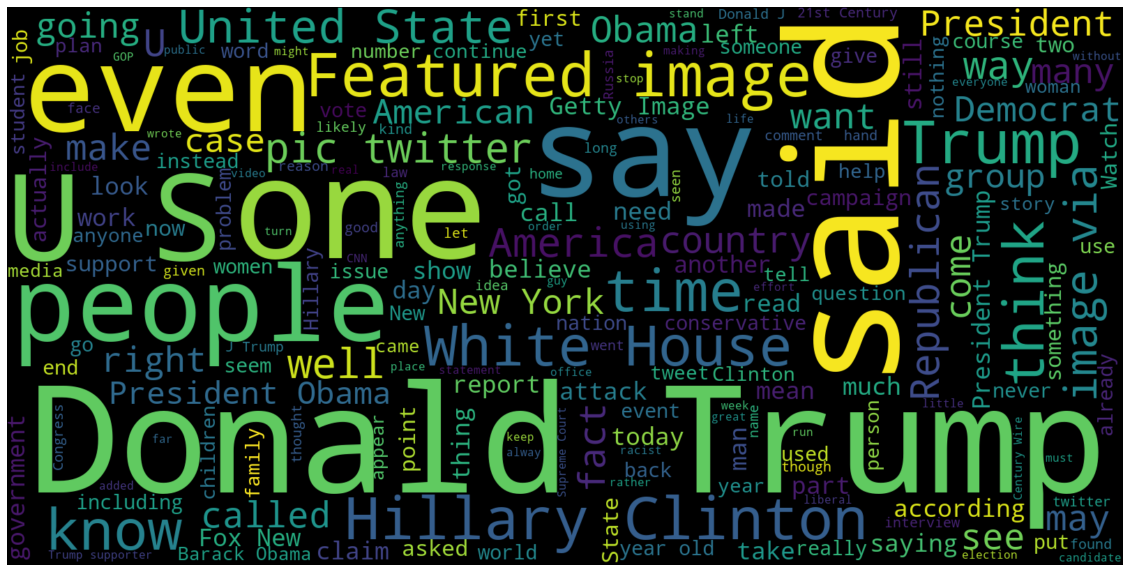

In [46]:
#For fake news
plt.figure(figsize = (20,20))
wc = WordCloud( width = 1600 , height = 800 ).generate(" ".join(df[df.label == 0].text))
plt.imshow(wc , interpolation = 'bilinear')
plt.axis("off")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

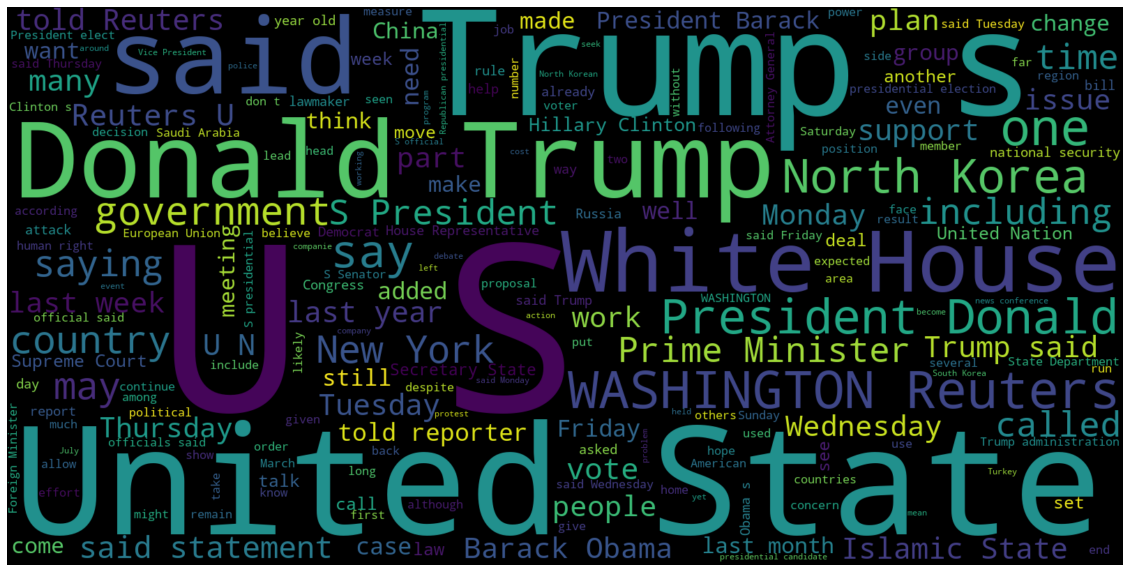

In [47]:
#For true news
plt.figure(figsize = (20,20))
wc = WordCloud(width = 1600 , height = 800 ).generate(" ".join(df[df.label == 1].text))
plt.imshow(wc , interpolation = 'bilinear')
plt.axis("off")
plt.show

In [48]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [49]:
#removing stop words, URLs, brackets, etc.
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]','', text)
def remove_url(text):
    return re.sub(r'http\S+','',text)
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)
def denoise_text(text):
    text = strip_html(text)
    text = remove_url(text)
    text = remove_stopwords(text)
    return text
df['text']=df['text'].apply(denoise_text)

def clean(text: str) -> list:
    'A simple function to cleanup text data'
    
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    text = (text.encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split() # tokenization
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

corpus = clean(' '.join(df[df.label == 0].text))
corpus = clean(' '.join(df[df.label == 1].text))

<function matplotlib.pyplot.show(close=None, block=None)>

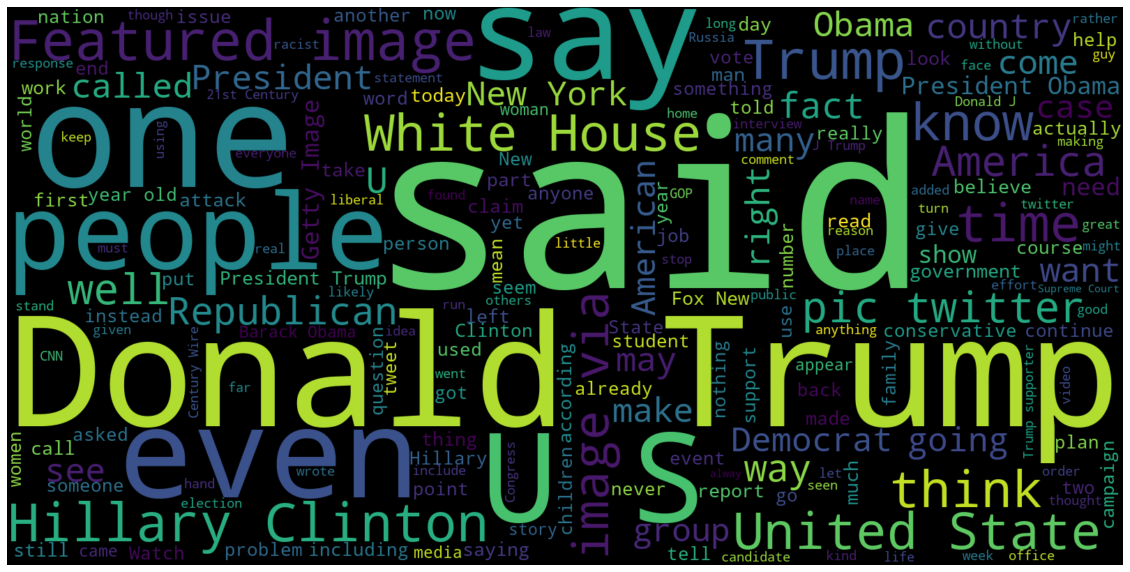

In [50]:
#For fake news
plt.figure(figsize = (20,20)) 
wc = WordCloud( width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.label == 0].text))
plt.imshow(wc , interpolation = 'bilinear')
plt.axis("off")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

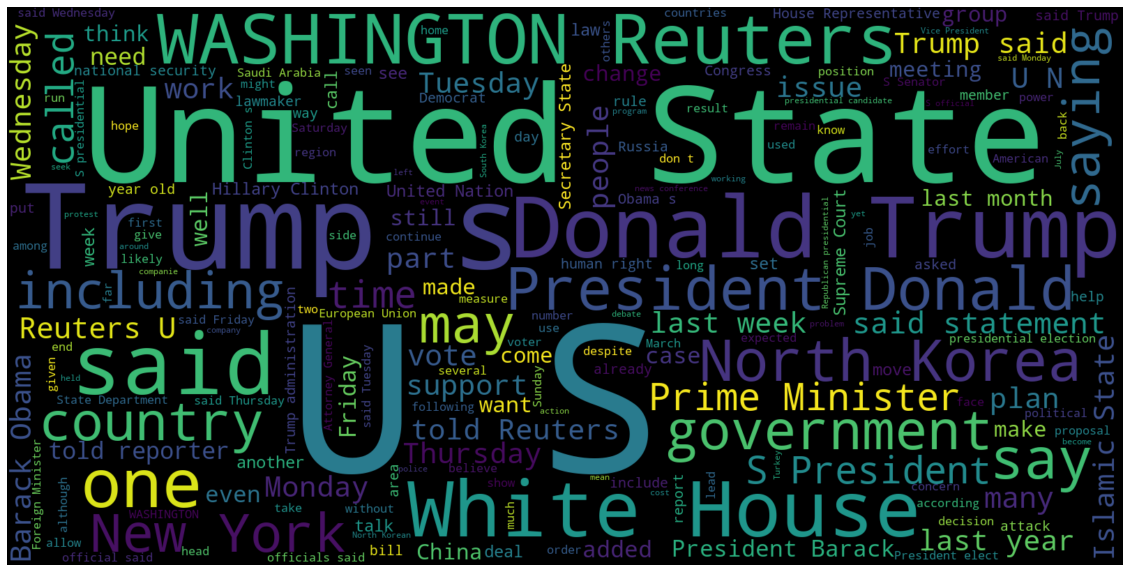

In [51]:
#For true news
plt.figure(figsize = (20,20)) # real
wc = WordCloud( width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.label == 1].text))
plt.imshow(wc , interpolation = 'bilinear')
plt.axis("off")
plt.show

In [52]:
#defining the dependent and independent var
x=df['text'].values
y=df['label'].values

In [53]:
#function to plot the confusion matrix
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm =cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, w/out normalization')
        
    thresh = cm. max() / 2.
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j, i , cm[i, j],
                 horizontalalignment='center', 
                 color="white"if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

In [54]:
#split training and testing
x_train,x_test,y_train,y_test  = train_test_split(x,y,random_state=42,test_size=.15) #split the data

In [55]:
#Logistic Regression
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

#Fitting the model
model = pipe.fit(x_train, y_train)
#Accuracy
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.11%


Confusion matrix, w/out normalization


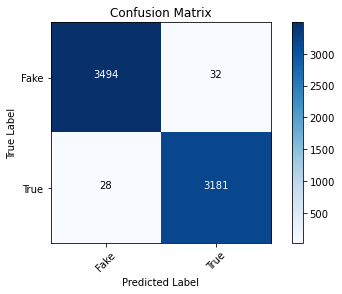

In [56]:
cm=metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'True'])

In [57]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3526
           1       0.99      0.99      0.99      3209

    accuracy                           0.99      6735
   macro avg       0.99      0.99      0.99      6735
weighted avg       0.99      0.99      0.99      6735



In [58]:
#Linear SVC
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LinearSVC())])

#Fitting the model
model = pipe.fit(x_train, y_train)

#Accuracy
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))


accuracy: 99.7%


Confusion matrix, w/out normalization


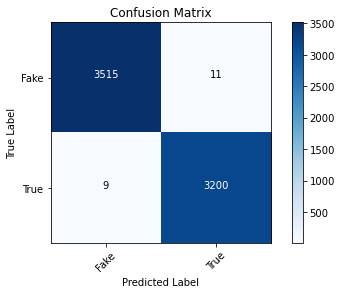

In [59]:
cm=metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'True'])

In [60]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3526
           1       1.00      1.00      1.00      3209

    accuracy                           1.00      6735
   macro avg       1.00      1.00      1.00      6735
weighted avg       1.00      1.00      1.00      6735



In [61]:
#Passive Agressive Classifier 
from sklearn.linear_model import PassiveAggressiveClassifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', PassiveAggressiveClassifier())])

model = pipe.fit(x_train, y_train)

#Accuracy
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))


accuracy: 99.69%


Confusion matrix, w/out normalization


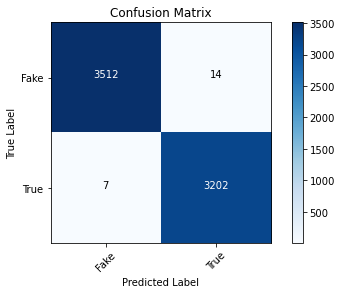

In [62]:
cm=metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'True'])

In [63]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3526
           1       1.00      1.00      1.00      3209

    accuracy                           1.00      6735
   macro avg       1.00      1.00      1.00      6735
weighted avg       1.00      1.00      1.00      6735



In [64]:
#MultinomialNB
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', MultinomialNB())])
#Fitting the model
model = pipe.fit(x_train, y_train)
#Accuracy
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 94.21%


Confusion matrix, w/out normalization


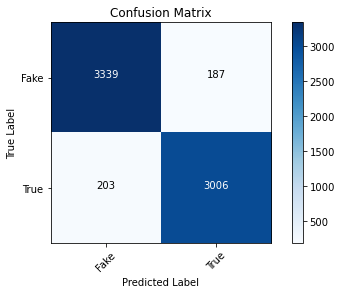

In [65]:
cm=metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'True'])

In [66]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      3526
           1       0.94      0.94      0.94      3209

    accuracy                           0.94      6735
   macro avg       0.94      0.94      0.94      6735
weighted avg       0.94      0.94      0.94      6735



In [67]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      3526
           1       0.94      0.94      0.94      3209

    accuracy                           0.94      6735
   macro avg       0.94      0.94      0.94      6735
weighted avg       0.94      0.94      0.94      6735

